In [2]:
from deep_translator import GoogleTranslator
from common import *
from drawmap import *

%matplotlib inline

fname = 'countries_imports'
output_path, save_path = set_output(fname)
output_path, save_path

('output', 'output/countries_imports.csv')

In [2]:
# Reading
path = get_rwdp()
df = pd.read_excel(path, engine='openpyxl')

In [3]:
# Cleaning 
df = pd.DataFrame(df['País_origen'].value_counts())
df.dropna()

# Modificaré las columnas con rename(), así que no coloco los países como índices.
df = df.reset_index()

# Filtering
# mask = (df['País_origen'] == 'Sin información') | (df['País_origen'] == 'República Dominicana')
mask = (df['País_origen'] == 'República Dominicana')
df = df[~mask]
df.rename(columns={"País_origen":"Country", "count":"Total_imports"}, inplace=True)
df

Country  Total_imports
0                        China         203794
1    Estados Unidos de América         154279
2                       España          25455
3                       Italia          17690
4                       México          17593
..                         ...            ...
186     San Cristóbal y Nieves              1
187                     Brunéi              1
188                      Libia              1
189               Burkina Faso              1
190                Islas Åland              1

[190 rows x 2 columns]

In [4]:
# Country column translation in order to match geojson countries for displaying the data on the map.
df['Country'] = df['Country'].apply(lambda x: str(GoogleTranslator(source='es', target='en').translate(x)))
df['Country'] = df['Country'].replace(['The Savior', 'Türkiye', 'United Kingdom'], ['El Salvador', 'Turkey', 'U.K. of Great Britain and Northern Ireland'])
df['Country'] = df['Country'].apply(lambda x: str(x.split('(')[0].strip()))

# Setting Country as the DataFrame index.
df.set_index('Country', inplace=True)

# Saving processed data
write_csv(df, save_path)

df

Total_imports
Country                                
China                            203794
United States of America         154279
Spain                             25455
Italy                             17690
Mexico                            17593
...                                 ...
Saint Kitts and Nevis                 1
Brunei                                1
Libya                                 1
Burkina Faso                          1
Aland Islands                         1

[190 rows x 1 columns]

In [5]:
# Ahora trabajaré con la data procesada.
df = open_csv(save_path)
df.set_index('Country', inplace=True)

# Organizamos la data de manera descendente.
# df = df.sort_values(by='Total_imports', ascending=False)
df

Total_imports
Country                                
China                            203794
United States of America         154279
Spain                             25455
Italy                             17690
Mexico                            17593
...                                 ...
Saint Kitts and Nevis                 1
Brunei                                1
Libya                                 1
Burkina Faso                          1
Aland Islands                         1

[190 rows x 1 columns]

In [6]:
plot_lim = 10
safe_lim = 15
bp = df[:plot_lim] if plot_lim <= safe_lim else df[:safe_lim] # Top 15 | x -> plot_lim

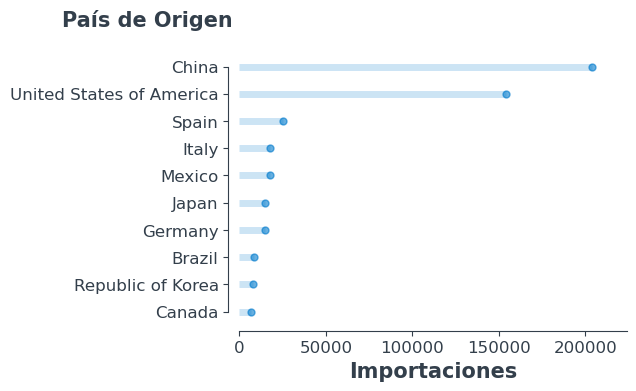

In [7]:
# Ordenamos de manera ascendente para graficar de abajo hacia arriba.
bp = bp.sort_values(by='Total_imports', ascending=True)

x = 'Importaciones'
y = 'País de Origen'
colname = 'Total_imports'

fig, ax = draw_hplot(x, y, bp, colname)

In [8]:
save_plot(fig, 'h', output_path)

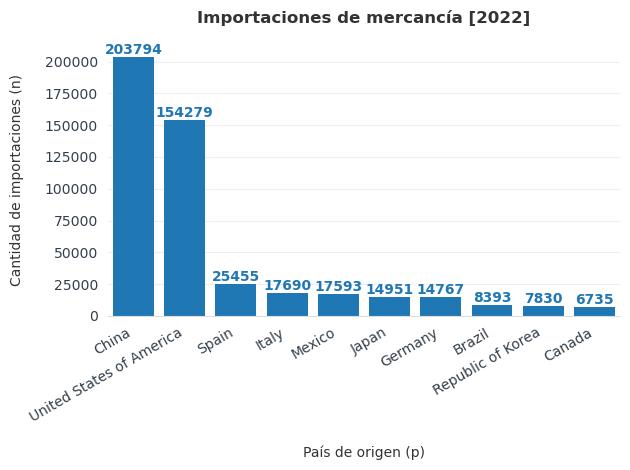

In [9]:
bp = bp.sort_values(by='Total_imports', ascending=False)

colname = 'Total_imports'
title = 'Importaciones de mercancía [2022]'
x = 'País de origen (p)'
y = 'Cantidad de importaciones (n)'

fig, ax = draw_vplot(x, y, bp, colname, title)

In [10]:
save_plot(fig, 'v', output_path)

In [11]:
print("Total de paises que importaron a República Dominicana en 2022:", len(df.index)) 

Total de paises que importaron a República Dominicana en 2022: 190


In [12]:
df = df.reset_index()

In [13]:
geojson_path = 'maps/world/world-administrative-boundaries.geojson'

options = {
            "tls": 'openstreetmap' , # cartodb positron
            "data_geojson": open_json(geojson_path), 
            "cols": ['Country', 'Total_imports'],
            "aliases": ['País', 'Importaciones'],
            "df": df,
            "lefton": 'name',
            "lyrname": 'Importaciones',
            "keyon": 'feature.properties.name',
            "fcolor": 'Pastel2',
            "lgname": 'Países importadores hacia República Dominicana (2022)',
            "nfcolor": 'gray',
            "higlt": True,
          }

imap = draw_map(**options)
imap

In [14]:
save_map(imap, output_path)